In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import shutil

In [2]:
# original directory
directory='/data/deeplearning/proj1_data/Cat_and_Dog/'

In [3]:
# base directory with small data
base_dir='/data/deeplearning/proj1_data/CandDsmall/'

#os.mkdir(base_dir)

In [4]:
train_dir=os.path.join(base_dir,'train')

#os.mkdir(train_dir)

In [5]:
valid_dir=os.path.join(base_dir,'valid')

#os.mkdir(valid_dir)

In [6]:
test_dir=os.path.join(base_dir,'test')

#os.mkdir(test_dir)

In [7]:
train_dir_cat=os.path.join(train_dir,'cats')

#os.mkdir(train_dir_cat)
train_dir_dog=os.path.join(train_dir,'dogs')

#os.mkdir(train_dir_dog)

In [8]:
valid_dir_cat=os.path.join(valid_dir,'cats')

#os.mkdir(valid_dir_cat)
valid_dir_dog=os.path.join(valid_dir,'dogs')

#os.mkdir(valid_dir_dog)

In [9]:
test_dir_cat=os.path.join(test_dir,'cats')

#os.mkdir(test_dir_cat)
test_dir_dog=os.path.join(test_dir,'dogs')

#os.mkdir(test_dir_dog)

In [10]:
fnames=['cat.{}.jpg'.format(i) for i in range(3000)]
for name in fnames:
    src=os.path.join(directory+'/train/',name)
    dst=os.path.join(train_dir_cat,name)
    shutil.copyfile(src,dst)

In [11]:
fnames=['dog.{}.jpg'.format(i) for i in range(3000)]
for name in fnames:
    src=os.path.join(directory+'/train/',name)
    dst=os.path.join(train_dir_dog,name)
    shutil.copyfile(src,dst)

In [12]:
fnames=['cat.{}.jpg'.format(i) for i in range(3000,4000)]
for name in fnames:
    src=os.path.join(directory+'/train/',name)
    dst=os.path.join(valid_dir_cat,name)
    shutil.copyfile(src,dst)
    
fnames=['dog.{}.jpg'.format(i) for i in range(3000,4000)]
for name in fnames:
    src=os.path.join(directory+'/train/',name)
    dst=os.path.join(valid_dir_dog,name)
    shutil.copyfile(src,dst)

In [13]:
fnames=['cat.{}.jpg'.format(i) for i in range(4000,5000)]
for name in fnames:
    src=os.path.join(directory+'/train/',name)
    dst=os.path.join(test_dir_cat,name)
    shutil.copyfile(src,dst)
    
fnames=['dog.{}.jpg'.format(i) for i in range(4000,5000)]
for name in fnames:
    src=os.path.join(directory+'/train/',name)
    dst=os.path.join(test_dir_dog,name)
    shutil.copyfile(src,dst)

### Data Preprocessing 

In [14]:
from keras.preprocessing.image import ImageDataGenerator

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [16]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=50,class_mode='binary')

Found 6000 images belonging to 2 classes.


In [17]:
valid_generator=test_datagen.flow_from_directory(valid_dir,target_size=(150,150),batch_size=50,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [18]:
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=50,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [19]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [20]:
valid_generator.class_indices

{'cats': 0, 'dogs': 1}

In [21]:
test_generator.class_indices

{'cats': 0, 'dogs': 1}

### Model Architecture 

In [22]:
from keras.models import  Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [25]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 128)       73856     
__________

### Fitting Model using batch generator 

In [26]:
from keras.optimizers import RMSprop

In [27]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [27]:
cnn=model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=valid_generator,validation_steps=50)

Epoch 1/10
100/100 [==============================] - 163s 2s/step - loss: 0.7679 - acc: 0.5105 - val_loss: 0.6662 - val_acc: 0.5800
Epoch 2/10
100/100 [==============================] - 162s 2s/step - loss: 0.7018 - acc: 0.5315 - val_loss: 0.6922 - val_acc: 0.5150
Epoch 3/10
100/100 [==============================] - 162s 2s/step - loss: 0.6869 - acc: 0.5410 - val_loss: 0.6761 - val_acc: 0.5810
Epoch 4/10
100/100 [==============================] - 161s 2s/step - loss: 0.6758 - acc: 0.5810 - val_loss: 0.6733 - val_acc: 0.5860
Epoch 5/10
100/100 [==============================] - 162s 2s/step - loss: 0.6626 - acc: 0.6110 - val_loss: 0.6699 - val_acc: 0.6080
Epoch 6/10
100/100 [==============================] - 163s 2s/step - loss: 0.6414 - acc: 0.6505 - val_loss: 0.6406 - val_acc: 0.6190
Epoch 7/10
100/100 [==============================] - 164s 2s/step - loss: 0.5833 - acc: 0.7015 - val_loss: 0.6114 - val_acc: 0.6720
Epoch 8/10
100/100 [==============================] - 164s 2s/step - 

In [51]:
#save model
model.save(directory+'cat_and_dog_small.h5')

### Visualizing Accuracy and Loss Cycle 

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
acc=cnn.history['acc']
val_acc=cnn.history['val_acc']
loss=cnn.history['loss']
val_loss=cnn.history['val_loss']

epochs=range(1,len(acc)+1)


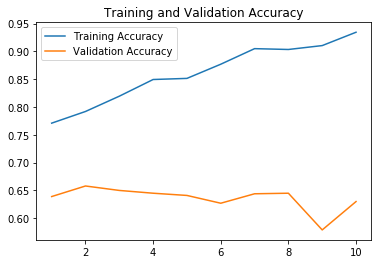

In [62]:
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

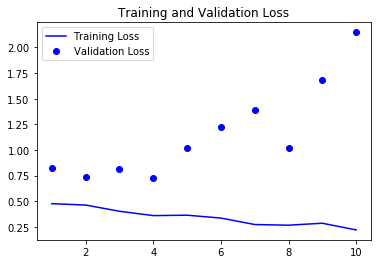

In [66]:
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'bo',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

### Data Augmentation 

In [28]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=50,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [32]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=50,class_mode='binary')

Found 6000 images belonging to 2 classes.


In [33]:
valid_generator=test_datagen.flow_from_directory(valid_dir,target_size=(150,150),batch_size=50,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [34]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [ ]:
cnn2=model.fit_generator(train_generator,steps_per_epoch=120,epochs=20,validation_data=valid_generator,validation_steps=40)

Epoch 1/20
120/120 [==============================] - 434s 4s/step - loss: 0.7632 - acc: 0.5057 - val_loss: 0.6874 - val_acc: 0.5415
Epoch 2/20
120/120 [==============================] - 420s 3s/step - loss: 0.6935 - acc: 0.5220 - val_loss: 0.6926 - val_acc: 0.5235
Epoch 3/20
120/120 [==============================] - 418s 3s/step - loss: 0.6884 - acc: 0.5383 - val_loss: 0.6889 - val_acc: 0.5435
Epoch 4/20
120/120 [==============================] - 418s 3s/step - loss: 0.6860 - acc: 0.5592 - val_loss: 0.6852 - val_acc: 0.5740
Epoch 5/20
120/120 [==============================] - 416s 3s/step - loss: 0.6854 - acc: 0.5570 - val_loss: 0.6853 - val_acc: 0.5585
Epoch 6/20
120/120 [==============================] - 416s 3s/step - loss: 0.6830 - acc: 0.5607 - val_loss: 0.6846 - val_acc: 0.5495
Epoch 7/20
120/120 [==============================] - 415s 3s/step - loss: 0.6821 - acc: 0.5607 - val_loss: 0.6780 - val_acc: 0.5825
Epoch 8/20
120/120 [==============================] - 413s 3s/step - 

In [26]:
acc=cnn2.history['acc']
val_acc=cnn2.history['val_acc']
loss=cnn2.history['loss']
val_loss=cnn2.history['val_loss']

epochs=range(1,len(acc)+1)


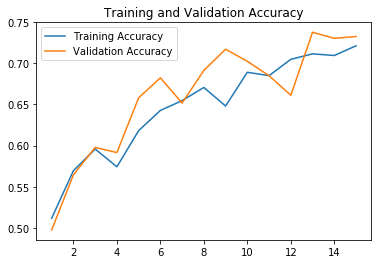

In [29]:
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

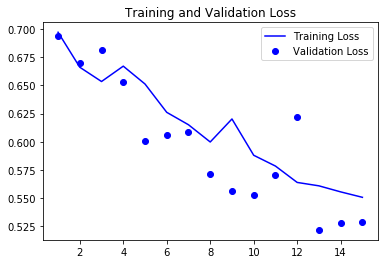

In [30]:
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'bo',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

### Save Model 

In [31]:
# serialize model to JSON
model_json = model.to_json()
with open(directory+"cd_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(directory+"cd_model.h5")
print("Saved model to disk")
 
 


Saved model to disk


### Using Pretrained Network 

In [3]:
from keras.applications import VGG16

In [6]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

In [7]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

### Fast feature Extraction 

In [10]:
import os,shutil
from keras.preprocessing.image import ImageDataGenerator 

In [9]:
base_dir='/data/deeplearning/proj1_data/CandDsmall/'
train_dir=os.path.join(base_dir,'train')
valid_dir=os.path.join(base_dir,'valid')
test_dir=os.path.join(base_dir,'test')


In [12]:
datagen=ImageDataGenerator(rescale=1./255)

In [14]:
def extract_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,4,4,512))
    labels=np.zeros(shape=(sample_count,))
    batch_size=20
    generator=datagen.flow_from_directory(
    directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='binary'
    )
    i=0
    for image_batch,label_batch in generator:
        feature_batch=conv_base.predict(image_batch)
        features[i*batch_size:(i+1)*batch_size]=feature_batch
        labels[i*batch_size:(i+1)*batch_size]=label_batch
        i+=1
        if i* batch_size >=sample_count:
            break
    return features,labels

        

In [15]:
train_features,train_labels=extract_features(train_dir,2000)

Found 2000 images belonging to 2 classes.


In [16]:
valid_features,valid_labels=extract_features(valid_dir,1000)

Found 1000 images belonging to 2 classes.


In [17]:
test_features,test_labels=extract_features(test_dir,1000)

Found 1000 images belonging to 2 classes.


In [25]:
train_features=np.reshape(train_features,(2000,4*4*512))
valid_features=np.reshape(valid_features,(1000,4*4*512))
test_features=np.reshape(test_features,(1000,4*4*512))

In [26]:
from keras.models import  Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.optimizers import RMSprop

In [27]:
model=Sequential()
model.add(Dense(256,input_shape=(4*4*512,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(adam,metrics=['acc'],loss='binary_crossentropy')

In [29]:
cnn_feat_ext=model.fit(train_features,train_labels,epochs=10,validation_data=(valid_features,valid_labels),batch_size=20)

Train on 2000 samples, validate on 1000 samples
Epoch 1/10
2000/2000 [==============================] - 1s 629us/step - loss: 3.2720 - acc: 0.6290 - val_loss: 0.3163 - val_acc: 0.8770
Epoch 2/10
2000/2000 [==============================] - 1s 550us/step - loss: 0.3872 - acc: 0.8310 - val_loss: 0.2633 - val_acc: 0.8980
Epoch 3/10
2000/2000 [==============================] - 1s 562us/step - loss: 0.3249 - acc: 0.8660 - val_loss: 0.2908 - val_acc: 0.8760
Epoch 4/10
2000/2000 [==============================] - 1s 560us/step - loss: 0.2700 - acc: 0.8935 - val_loss: 0.2583 - val_acc: 0.8960
Epoch 5/10
2000/2000 [==============================] - 1s 575us/step - loss: 0.2433 - acc: 0.9030 - val_loss: 0.2607 - val_acc: 0.9000
Epoch 6/10
2000/2000 [==============================] - 1s 582us/step - loss: 0.2051 - acc: 0.9180 - val_loss: 0.2754 - val_acc: 0.9050
Epoch 7/10
2000/2000 [==============================] - 1s 559us/step - loss: 0.1736 - acc: 0.9245 - val_loss: 0.2972 - val_acc: 0.8970


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
acc=cnn_feat_ext.history['acc']
val_acc=cnn_feat_ext.history['val_acc']
loss=cnn_feat_ext.history['loss']
val_loss=cnn_feat_ext.history['val_loss']

epochs=range(1,len(acc)+1)


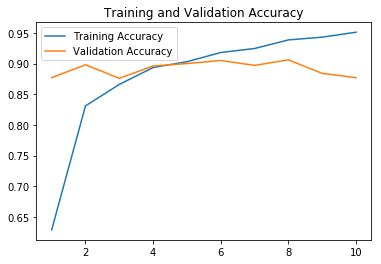

In [32]:
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

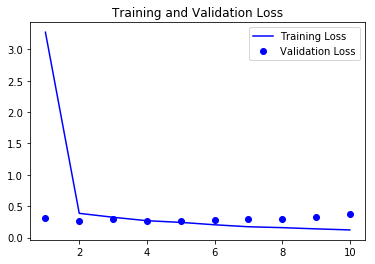

In [33]:
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'bo',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [38]:
res_loss,res_acc=model.evaluate(test_features,test_labels)

1000/1000 [==============================] - 0s 111us/step


In [39]:
res_acc

0.84799999999999998

### Fine tuning Code 

In [35]:
conv_base.trainable=True # unfreeze
set_trainable=False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

In [32]:
from load import *

In [33]:
global model, graph
model, graph = init()

Loaded model from disk


In [35]:
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img,array_to_img


In [36]:
image=load_img('/data/deeplearning/proj1_data/Cat_and_Dog/test/1.jpg',target_size=(150,150))
image=img_to_array(image)
image=image/255
image=image.reshape(1,150,150,3) 
pred=model.predict(image)

In [40]:
1-pred[0][0]

0.39098674058914185

In [ ]:
image=load_img(image,target_size=(150,150))
image=img_to_array(image)
image=image.reshape(1,150,150,3) 
pred=model.predict(image)